<h1 style="text-align:center; font-size:24px;">Name:Rohan Nachane</h1>

<h2 style="text-align:center; font-size:25px; color:blue;"><b>Practical 07-K means Clustering</b></h2>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df=pd.read_csv("Iris.csv")

In [23]:
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [24]:
#df.isnull()

In [25]:
#df.isnull().sum()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [27]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['Id'], axis=1))

In [30]:
#scaled_features

In [31]:
from sklearn.cluster import KMeans

In [32]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

C:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

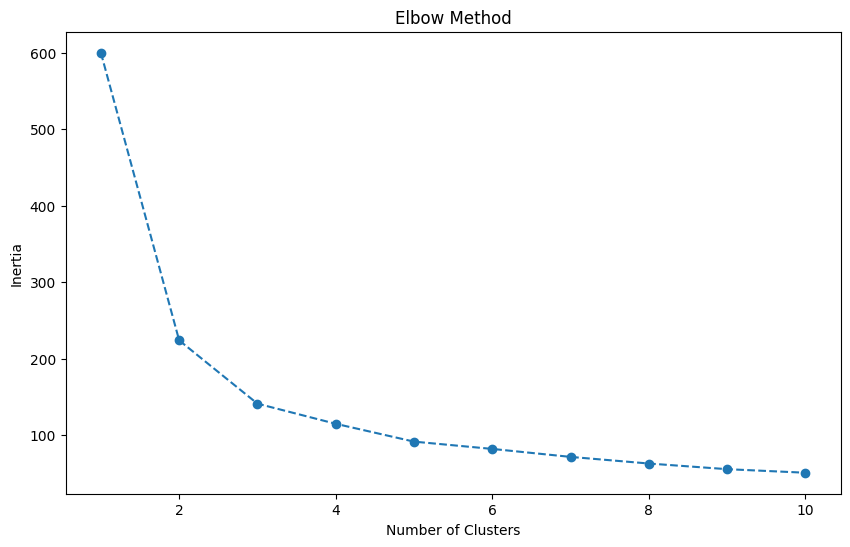

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [34]:
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_

C:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
cluster_groups = df.groupby('Cluster')

In [44]:
for cluster, group in cluster_groups:
    print(f'Cluster {cluster}:')
    #print(group[['Id']])  
    #print()

Cluster 0:
Cluster 1:
Cluster 2:


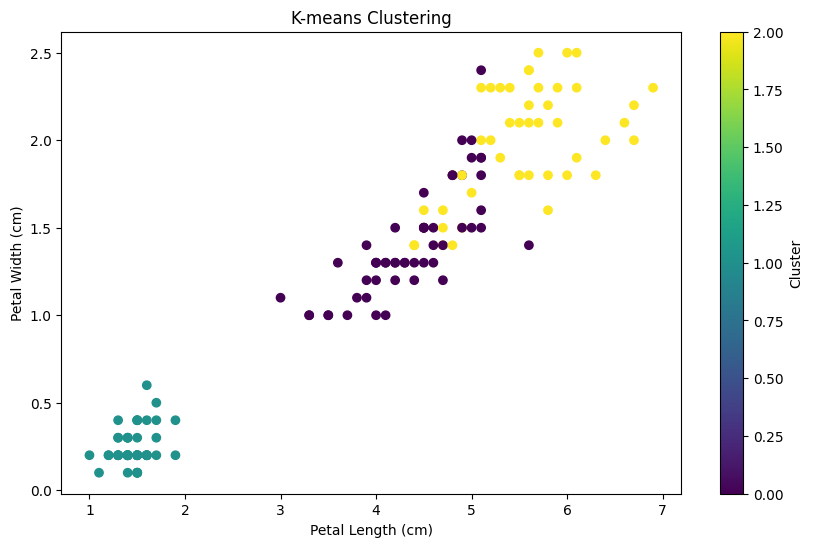

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.colorbar(label='Cluster')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.46
